In [2]:
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
idx = np.in1d(iris.target, [0,1])
X0 = iris.data[idx, :1]
X = sm.add_constant(X0)
y = iris.target[idx]

In [4]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Fri, 21 May 2021   Pseudo R-squ.:                  0.5368
Time:                        14:41:52   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -27.8315      5.434     -5.122      0.000     -38.481     -17.182
x1             5.1403      1.007      5.107      0.000       3.168       7.113


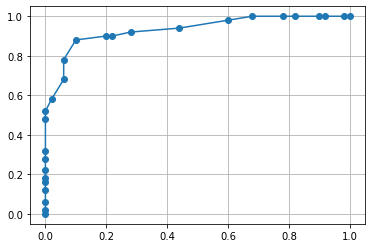

In [5]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, logit_res.fittedvalues)
plt.plot(fpr, tpr, 'o-')
plt.grid(True)
plt.show()